In [22]:
import pandas as pd
A=pd.read_csv("C:/Users/Neha/Downloads/PythonNotes/Cars93.csv")

In [23]:
A

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [24]:
A=A.drop(labels=['Unnamed: 0'],axis=1)

# Data Preprocessing

In [25]:
A.isna().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

<AxesSubplot:>

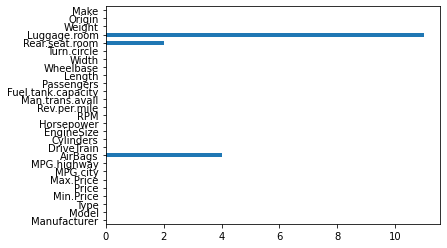

In [26]:
A.isna().sum().plot(kind='barh')

# Domain knowledge: Customers, generally look for price, mileage

In [27]:
B=A[['Price','MPG.city']]

In [28]:
B

,Price,MPG.city
0,15.9,25
1,33.9,18
2,29.1,20
3,37.7,19
4,30.0,22
...,...,...
88,19.7,17
89,20.0,21
90,23.3,18
91,22.7,21


In [29]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
trres = km.fit(B)

In [30]:
trres.labels_

array([0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2])

In [33]:
B['cluster_cartype'] = trres.labels_

<ipython-input-33-79e1bfbeb945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['cluster_cartype'] = trres.labels_


In [34]:
B

,Price,MPG.city,cluster_cartype
0,15.9,25,0
1,33.9,18,1
2,29.1,20,1
3,37.7,19,1
4,30.0,22,1
...,...,...,...
88,19.7,17,2
89,20.0,21,2
90,23.3,18,2
91,22.7,21,2


In [35]:
B['Car_model']=A.Model

<ipython-input-35-723af5f362fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['Car_model']=A.Model


In [36]:
B.head()

,Price,MPG.city,cluster_cartype,Car_model
0,15.9,25,0,Integra
1,33.9,18,1,Legend
2,29.1,20,1,90
3,37.7,19,1,100
4,30.0,22,1,535i


In [37]:
B.sort_values(by="cluster_cartype")

,Price,MPG.city,cluster_cartype,Car_model
0,15.9,25,0,Integra
78,11.1,28,0,SL
28,12.2,29,0,Summit
30,7.4,31,0,Festiva
31,10.1,23,0,Escort
...,...,...,...,...
91,22.7,21,2,240
55,19.1,18,2,MPV
60,14.9,19,2,Cougar
26,15.6,21,2,Dynasty


Text(0, 0.5, 'Mileage')

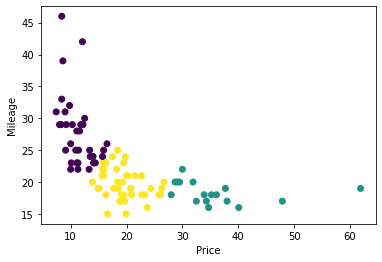

In [38]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=B.cluster_cartype)
plt.xlabel("Price")
plt.ylabel("Mileage")

In [39]:
q = {0:"red",1:"blue",2:"black"}

In [40]:
col=[]
for i in B.cluster_cartype:
    col.append(q[i])

In [41]:
B['Color']=col

<ipython-input-41-8db169566567>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['Color']=col


In [43]:
B.head(3)

,Price,MPG.city,cluster_cartype,Car_model,Color
0,15.9,25,0,Integra,red
1,33.9,18,1,Legend,blue
2,29.1,20,1,90,blue


Text(0, 0.5, 'Mileage')

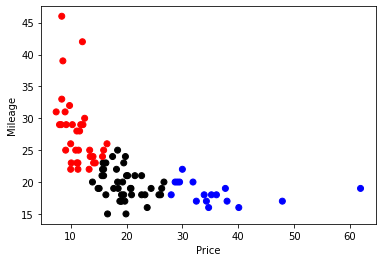

In [45]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=B.Color)
plt.xlabel("Price")
plt.ylabel("Mileage")

# Elbow Curve

In [57]:
B=A[['Price',"MPG.city"]]
WCSS = []
k = range(2,10,1)

for i in k:
    km = KMeans(n_clusters=i)
    results = km.fit(B)
    WCSS.append(results.inertia_)

In [58]:
WCSS

[5300.007898550725,
 3074.6626662638637,
 2169.665309941521,
 1474.9304180107524,
 1069.8733763440862,
 797.188897619048,
 673.318718325153,
 548.197102163537]

In [59]:
list(zip(k,WCSS))

[(2, 5300.007898550725),
 (3, 3074.6626662638637),
 (4, 2169.665309941521),
 (5, 1474.9304180107524),
 (6, 1069.8733763440862),
 (7, 797.188897619048),
 (8, 673.318718325153),
 (9, 548.197102163537)]

([<matplotlib.axis.XTick at 0x1e7152596d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

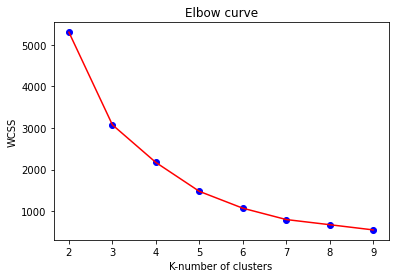

In [60]:
plt.scatter(k,WCSS,c="blue")
plt.plot(k,WCSS,c="red")
plt.xlabel("K-number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")
plt.xticks(range(2,10,1))

In [61]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
trres = km.fit(B)

In [62]:
B['cluster_cartype'] = trres.labels_

<ipython-input-62-79e1bfbeb945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['cluster_cartype'] = trres.labels_


In [63]:
B['Car_model']=A.Model

<ipython-input-63-723af5f362fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['Car_model']=A.Model


In [64]:
B.head()

,Price,MPG.city,cluster_cartype,Car_model
0,15.9,25,0,Integra
1,33.9,18,1,Legend
2,29.1,20,1,90
3,37.7,19,1,100
4,30.0,22,1,535i


Text(0, 0.5, 'Mileage')

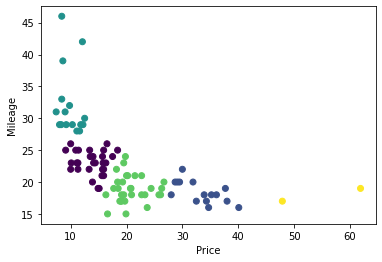

In [65]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=B.cluster_cartype)
plt.xlabel("Price")
plt.ylabel("Mileage")

# Hierarchical Clustering

In [71]:
B=A[['Price','MPG.city']]
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5,linkage="complete")
res = agc.fit(B)
B.clusters = res.labels_

<ipython-input-71-a994bf1342a9>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  B.clusters = res.labels_


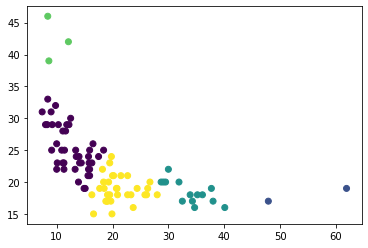

In [72]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=B.clusters)

In [74]:
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial import distance_matrix
D = pd.DataFrame(distance_matrix(B.values, B.values), index=B.index, columns=B.index)

<ipython-input-75-def4163ab479>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram(linkage(D))


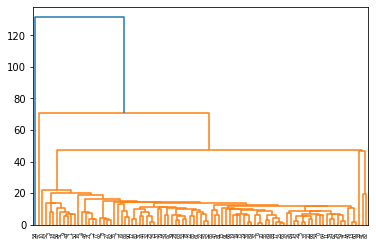

In [75]:
dendrogram(linkage(D))
plt.show()